# Here is the diabetes dataset and we are going to predict that whether a patient is diabetic or not using Artificial neural network.

### Information about dataset attributes -

**Pregnancies:** To express the Number of pregnancies

**Glucose:** To express the Glucose level in blood

**BloodPressure:** To express the Blood pressure measurement

**SkinThickness:** To express the thickness of the skin

**Insulin:** To express the Insulin level in blood

**BMI:** To express the Body mass index

**DiabetesPedigreeFunction:** To express the Diabetes percentage

**Age:** To express the age

**Outcome:** To express the final result 1 is Yes and 0 is No

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("C:\\Users\\adite\\Downloads\\diabetes.csv")
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## * Data understanding

In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## *Data Visualization

In [8]:
diabetes_visualization=dataset[dataset.Outcome==1]
diabetes_visualization.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Text(0, 0.5, 'Frequency')

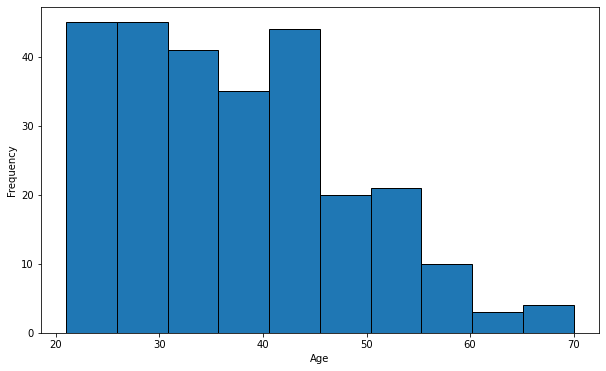

In [9]:
plt.figure(figsize=(10,6))
plt.hist(diabetes_visualization.Age,edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")


Age range of people who are diabetic is between 25 to 45 years.

Text(0, 0.5, 'Frequency')

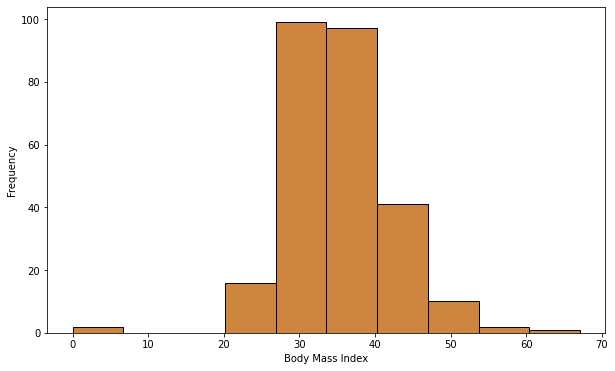

In [10]:
plt.figure(figsize=(10,6))
plt.hist(diabetes_visualization.BMI,color = "peru",edgecolor="black")
plt.xlabel("Body Mass Index")
plt.ylabel("Frequency")


From above histogram we can say that the range of BMI of the patients who has diabetes is between appro. 27-40.

## Splitting datasets

In [11]:
X=dataset.drop(["Outcome"],axis=1)
y=dataset[["Outcome"]]

## * Data Preprocessing

In [12]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Dataset is imbalance. We have to balance it. for that we are going to use SMOTE method of sampleing.

In [13]:
#!pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE
smote_method=SMOTE(random_state=12)
resampled_x,resampled_y=smote_method.fit_resample(X,y)
resampled_x.shape,resampled_y.shape

((1000, 8), (1000, 1))

In [15]:
resampled_y.value_counts()

Outcome
0          500
1          500
dtype: int64

## *Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(resampled_x)
scaled_y=scaler.fit_transform(resampled_y)
scaled_y

array([[ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
      

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resampled_x,resampled_y,test_size=0.2,random_state=12)

## * Logistic Model Training

In [18]:
from sklearn.linear_model import LogisticRegression
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train,y_train)

LogisticRegression()

In [19]:
logistic_y_train_pred=Logistic_model.predict(x_train)

In [20]:
from sklearn.metrics import accuracy_score as ac, classification_report,confusion_matrix

logi_score=ac(y_train,logistic_y_train_pred)

### Training Results

In [21]:
print("Training dataset accuracy using Logistic regression is: ",logi_score)
print(70*"_","\n")
print("Classification report using Logistic regression is :\n", classification_report(y_train,logistic_y_train_pred))
print(70*"_","\n")
print("Confusion matrix is :\n",confusion_matrix(y_train,logistic_y_train_pred))

Training dataset accuracy using Logistic regression is:  0.7375
______________________________________________________________________ 

Classification report using Logistic regression is :
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       408
           1       0.73      0.73      0.73       392

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

______________________________________________________________________ 

Confusion matrix is :
 [[303 105]
 [105 287]]


### Testing results

In [22]:
logistic_y_test_pred=Logistic_model.predict(x_test)

In [23]:
print("Testing dataset accuracy using Logistic regression is: ",ac(y_test,logistic_y_test_pred))
print(70*"_","\n")
print("Classification report using Logistic regression is :\n", classification_report(y_test,logistic_y_test_pred))
print(70*"_","\n")
print("Confusion matrix is :\n",confusion_matrix(y_test,logistic_y_test_pred))

Testing dataset accuracy using Logistic regression is:  0.73
______________________________________________________________________ 

Classification report using Logistic regression is :
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        92
           1       0.79      0.68      0.73       108

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

______________________________________________________________________ 

Confusion matrix is :
 [[73 19]
 [35 73]]


# Neural Network Model Training

In [31]:
#!pip install keras
#!pip install tensorflow

In [25]:
import keras
import tensorflow

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
neural_model=Sequential()
neural_model.add(Dense(20,input_dim=8,activation="relu",kernel_initializer="normal"))
neural_model.add(Dense(8,activation="relu",kernel_initializer="normal"))
neural_model.add(Dense(1,activation="sigmoid"))

In [52]:
neural_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [60]:
neural_model.fit(x_train,y_train,epochs=150,batch_size=50)

Epoch 1/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8062
Epoch 2/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8012
Epoch 3/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8037
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7962
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.7975
Epoch 6/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8037
Epoch 7/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8025
Epoch 8/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8075
Epoch 9/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.7887
Epoch 10/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7937
Epoch 11/

16/16 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8125
Epoch 84/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8087
Epoch 85/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8250
Epoch 86/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8138
Epoch 87/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8163
Epoch 88/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8125
Epoch 89/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8087
Epoch 90/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8188
Epoch 91/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8188
Epoch 92/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8125
Epoch 93/150


In [61]:
neuron_y_train_pred=neural_model.predict(x_train)

25/25 [==============================] - 0s 2ms/step


In [62]:
neural_model.evaluate(x_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8213


[0.39614081382751465, 0.8212500214576721]

In [63]:
neural_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8050


[0.5687616467475891, 0.8050000071525574]

## SVM model

In [64]:
from sklearn.svm import SVC

In [98]:
svm_model1=SVC(kernel="linear")
svm_model1.fit(x_train,y_train)

SVC(kernel='linear')

In [99]:
svm_y_train_pred1=svm_model1.predict(x_train)

In [100]:
ac(y_train,svm_y_train_pred1)

0.73625

In [101]:
svm_y_test_pred1=svm_model1.predict(x_test)

In [102]:
print("Testing dataset accuracy using SVM is: ",ac(y_test,svm_y_test_pred1))
print(70*"_","\n")
print("Classification report using SVM is :\n", classification_report(y_test,svm_y_test_pred1))
print(70*"_","\n")
print("Confusion matrix is :\n",confusion_matrix(y_test,svm_y_test_pred1))

Testing dataset accuracy using SVM is:  0.755
______________________________________________________________________ 

Classification report using SVM is :
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        92
           1       0.84      0.68      0.75       108

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200

______________________________________________________________________ 

Confusion matrix is :
 [[78 14]
 [35 73]]


In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
rf_y_train_pred=rf_model.predict(x_train)
ac(y_train,rf_y_train_pred)

1.0

In [108]:
rf_y_test_pred=rf_model.predict(x_test)

In [109]:
print("Testing dataset accuracy using Random Forest is: ",ac(y_test,rf_y_test_pred))
print(70*"_","\n")
print("Classification report using Random Forest is :\n", classification_report(y_test,rf_y_test_pred))
print(70*"_","\n")
print("Confusion matrix is :\n",confusion_matrix(y_test,rf_y_test_pred))

Testing dataset accuracy using Random Forest is:  0.825
______________________________________________________________________ 

Classification report using Random Forest is :
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        92
           1       0.85      0.81      0.83       108

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

______________________________________________________________________ 

Confusion matrix is :
 [[77 15]
 [20 88]]
